In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer
from scipy.stats import norm
from scipy import stats

In [3]:
abalone = pd.read_csv("data/abalone.txt", header = None, 
            names = ["sex", "length", "diameter", "height", "whole_weight", "shucked weight", 
                     "Viscera_weight", "shell_weight", "rings"])
abalone

,sex,length,diameter,height,whole_weight,shucked weight,Viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# sex one hot encoding 
abalone = pd.get_dummies(abalone)

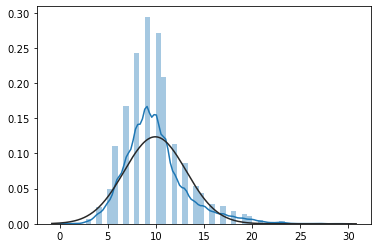

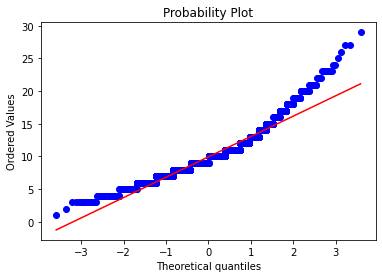

In [5]:
sns.distplot([abalone.rings], fit = norm)
fog = plt.figure()
res = stats.probplot(abalone.rings, plot = plt)

In [6]:
abalone

,length,diameter,height,whole_weight,shucked weight,Viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [7]:
#abalone #4177건
#7:3 비율로 train set / test set 데이터를 분할(random state = 20201005)
#train set -> 모델 -> test set -> 나이를 예측(rings) =>  rmsle적용 => 점수 출력
#random forest regressor 이용
# min max scaling

In [8]:
abalone.head()

,length,diameter,height,whole_weight,shucked weight,Viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


# train / test set split

In [9]:
X = abalone.drop(["rings"], axis = 1)
Y = abalone["rings"]
Y = np.ravel(Y)
X

,length,diameter,height,whole_weight,shucked weight,Viscera_weight,shell_weight,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3, random_state=20201005)

In [11]:
xtrain.shape, xtest.shape,ytrain.shape, ytest.shape

((2923, 10), (1254, 10), (2923,), (1254,))

In [12]:
# min - max scale 
scaler = MinMaxScaler()
xtrain_scale = scaler.fit_transform(xtrain)

In [13]:
def rmsle(pv, av):
    pv=np.array(pv)
    av=np.array(av)
    log_predict=np.log(pv+1)
    log_actual=np.log(av+1)
    res=log_predict-log_actual
    res=np.square(res)
    mean_res=res.mean()
    score=np.sqrt(mean_res)
    return score 

RMSLE = 0.169


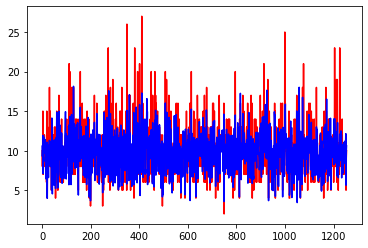

In [14]:
rf_model = RandomForestRegressor(n_estimators = 300, 
                                 max_depth = 7, random_state = 42)
rf_model.fit(xtrain, ytrain)
ypred = rf_model.predict(xtest)
plt.plot(ytest, color = 'red')
plt.plot(ypred, color = 'blue')

print("RMSLE = {}".format(round(rmsle(ytest, ypred), 3)))